#### Uses this article as a model: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA



In [10]:
data = pd.read_csv("./Resources/Final_Data.csv")

In [103]:

time_series_data = data.filter(['Zip_Code', 'Date', 'Sale_Price'], axis=1)
time_series_data.Date=pd.to_datetime(series['Date'])
zip_grouped = time_series_data.groupby(['Zip_Code'])
fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Sale_Price'].mean()
fl_grouped_df = pd.DataFrame(fl_grouped)
fl_grouped_arima = fl_grouped.set_index("Date")
# groups = dict(list(grouped))

# series['Date'] = [mdates.date2num(d) for d in series['Date']]
# for key in groups.keys():
#     print(key)



In [98]:
print(fl_grouped)

         Date     Sale_Price
0  2019-01-01  210310.735786
1  2019-02-01  213995.559819
2  2019-03-01  227301.418552
3  2019-04-01  224707.854626
4  2019-05-01  230186.072289
5  2019-06-01  232227.166117
6  2019-07-01  229688.156627
7  2019-08-01  229821.200878
8  2019-09-01  225084.075824
9  2019-10-01  226419.958333
10 2019-11-01  228857.534730
11 2019-12-01  232707.828415
12 2020-01-01  228164.240700
13 2020-02-01  233807.533040
14 2020-03-01  242654.038419
15 2020-04-01  248454.266147
16 2020-05-01  244335.600000
17 2020-06-01  250714.079694
18 2020-07-01  258028.705818
19 2020-08-01  260704.672907
20 2020-09-01  257781.619362
21 2020-10-01  261591.330752
22 2020-11-01  265525.501657
23 2020-12-01  271758.457143
24 2021-01-01  267950.267108
25 2021-02-01  273125.423651
26 2021-03-01  287407.456599


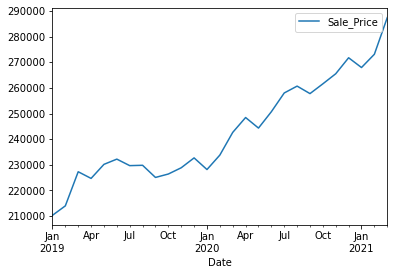

In [99]:
fl_grouped.plot(x='Date', y='Sale_Price')
plt.show()

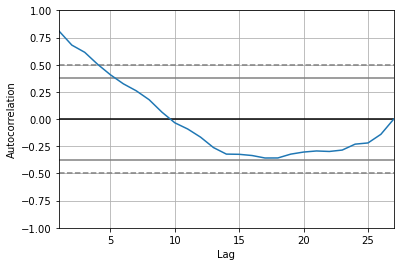

In [100]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fl_grouped.set_index('Date'))
plt.show()

### For Florida, auto-correlation in the time series reveals probably first 4 lags are significant, so choose 4 for starting point for AR parameter of the model.


In [107]:
data=pd.Series(fl_grouped.Sale_Price.values, index=fl_grouped.Date)

C:\Users\mille\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -258.633
Date:                Thu, 03 Jun 2021   AIC                            529.266
Time:                        17:38:35   BIC                            536.814
Sample:                    01-01-2019   HQIC                           531.439
                         - 03-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

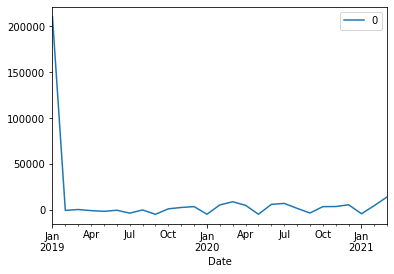

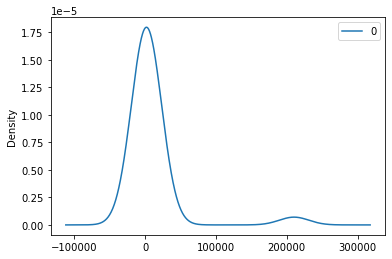

                   0
count      27.000000
mean     9556.575601
std     40388.502406
min     -4692.824002
25%     -1074.923096
50%      1794.646858
75%      5305.179830
max    210310.735786


In [128]:
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [111]:
#Predict median home price for Florida based on time series
yhat=model_fit.forecast()
print(yhat)

2021-04-01    288303.644352
Freq: MS, dtype: float64


In [113]:
#Predict median home price for Florida based on time series another way
yhat_2 = model_fit.predict(start=len(data), end=len(data))
print(yhat_2)

2021-04-01    288303.644352
Freq: MS, dtype: float64


In [125]:
# Work with zip code time series

zip_grouped_df = pd.DataFrame(zip_grouped)
# zip_grouped_df[1][0]
zip_32003 = zip_grouped_df[1][0]
zip_32003

,Zip_Code,Date,Sale_Price
0,32003,2019-01-01,244950.0
1,32003,2019-02-01,270000.0
2,32003,2019-03-01,275000.0
3,32003,2019-04-01,264500.0
4,32003,2019-05-01,281000.0
5,32003,2019-06-01,275000.0
6,32003,2019-07-01,282500.0
7,32003,2019-08-01,269577.0
8,32003,2019-09-01,286000.0
9,32003,2019-10-01,258000.0


In [131]:
zip_32003.drop("Zip_Code", axis=1)
zip_32003_arima = zip_32003.set_index("Date")

In [132]:
data=pd.Series(zip_32003.Sale_Price.values, index=zip_32003.Date)

C:\Users\mille\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -297.317
Date:                Thu, 03 Jun 2021   AIC                            606.634
Time:                        17:43:17   BIC                            614.183
Sample:                    01-01-2019   HQIC                           608.808
                         - 03-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

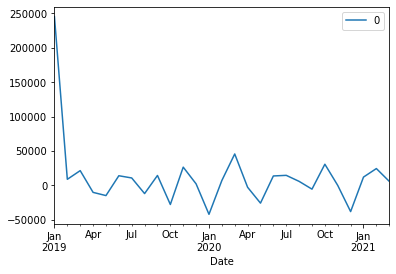

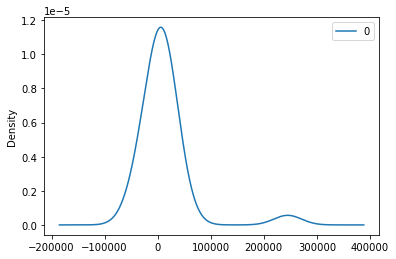

                   0
count      27.000000
mean    12134.113120
std     50848.048280
min    -41845.338448
25%     -7669.436665
50%      7197.116809
75%     14609.137842
max    244950.000000


In [133]:
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
# Bins for 'high growth', 'low growth', and 'loss' groups
# growth_bins = {}
# for name, values in 

# fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Sale_Price'].mean()
# fl_grouped_df = pd.DataFrame(fl_grouped)
# fl_grouped_arima = fl_grouped.set_index("Date")